In [1]:
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn import linear_model

In [6]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}

In [7]:
df = pd.DataFrame(ground_cricket_data)

# Data Cleaning

In [8]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [9]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [12]:
df.shape

(15, 2)

In [16]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

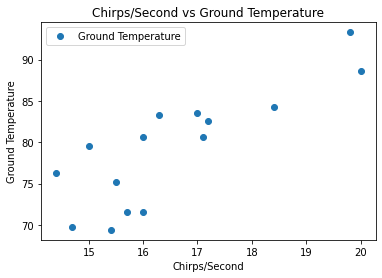

In [20]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [46]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


# Spliting

In [30]:
X = df.iloc[:, :-1]
y = df.iloc[:, 1]

In [36]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
X_train.shape,X_test.shape

((10, 1), (5, 1))

# Modeling

In [39]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)

LinearRegression()

In [40]:
print(regressor.intercept_)

28.83364496812826


In [41]:
print(regressor.coef_)

[3.06644775]


# Evalution

In [42]:
y_pred = regressor.predict(X_test)

In [43]:
y_pred

array([76.36358509, 77.89680896, 76.97687464, 89.54931041, 74.83036121])

In [44]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.672674621591977


# Find the linear regression equation for this data.

In [45]:
#equation y = 3.06644775 * x + 28.83364496812826

# Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [47]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.672674621591977


# Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [53]:
y= 95
x = (y-28.83364496812826)/3.06644775
x

21.577525666912717

# Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [51]:
regressor.predict([[18]])

array([84.02970446])